In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls /content/drive/MyDrive

 AIML_heart_prediction.pptx   insurance_data.csv
 Classroom		      Screenshot_2024-01-08-22-26-33-253_com.phonepe.app.jpg
'Colab Notebooks'	     'Untitled form (1).gform'
 deerajds.pdf		     'Untitled form (File responses)'
'Document from deeraj.pdf'   'Untitled form.gform'


In [5]:
file_path = '/content/drive/MyDrive/insurance_data.csv'
df = pd.read_csv(file_path)

In [6]:
df.head(10)

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],
                                                    df.bought_insurance,test_size=0.2, random_state=25)

In [8]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


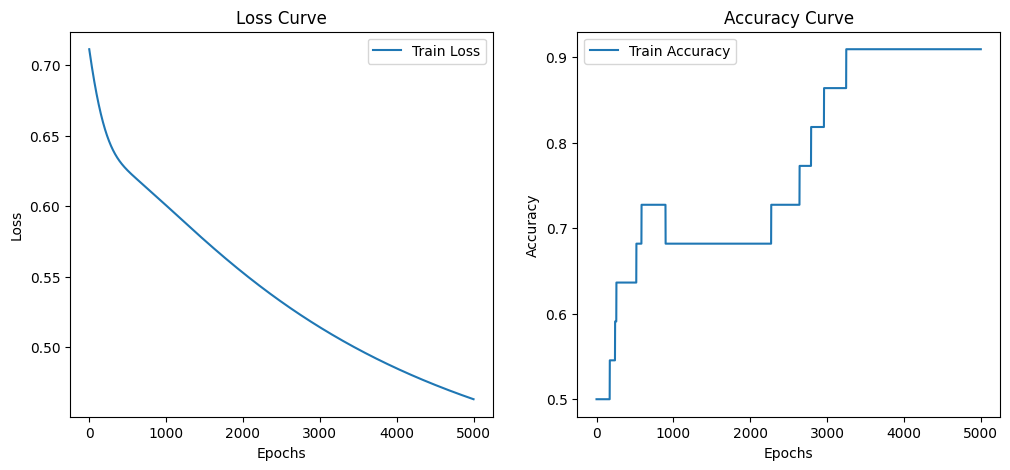

In [16]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(X_train_scaled, y_train, epochs=5000, verbose=0)

# Plot the training loss and accuracy curves
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.5000 - loss: 0.6880


[0.6879898905754089, 0.5]

In [12]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [13]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[0.77010477],
       [0.7209011 ],
       [0.5314143 ],
       [0.7385759 ],
       [0.77326363],
       [0.7915683 ]], dtype=float32)

In [14]:
coef, intercept = model.get_weights()

In [15]:
coef, intercept

(array([[0.8964399],
        [0.894828 ]], dtype=float32),
 array([-0.10725151], dtype=float32))